 # Data Understanding & Exploration

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

## Load the Dataset

In [2]:
df = pd.read_csv('../data/medical_noshow.csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset loaded: 110527 rows, 14 columns


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Initial Data Assessment

In [3]:
print("Dataset Overview")
print(f"Shape: {df.shape}")
print(f"Size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("Data Types Analysis")
df.info()

# Missing values check 
print("Missing Values Report")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_report[missing_report['Missing Count'] > 0])

if missing_data.sum() == 0:
    print("No missing values found")

Dataset Overview
Shape: (110527, 14)
Size: 44.33 MB

Column Names:
1. PatientId
2. AppointmentID
3. Gender
4. ScheduledDay
5. AppointmentDay
6. Age
7. Neighbourhood
8. Scholarship
9. Hipertension
10. Diabetes
11. Alcoholism
12. Handcap
13. SMS_received
14. No-show
Data Types Analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  H

## Statistical Analysis

In [4]:
# Numerical Statistics
print("Numerical Columns Statistics")
df.describe()

Numerical Columns Statistics


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#Categorical Statistics
print("Categorical Columns Statistics")
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].describe()

Categorical Columns Statistics


,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


## Target Variable Analysis

### Examine Target Variable

In [6]:
print("Target Variable: No-show")
print("Unique values:", df['No-show'].unique())
print("Value counts:")
print(df['No-show'].value_counts())

Target Variable: No-show
Unique values: ['No' 'Yes']
Value counts:
No-show
No     88208
Yes    22319
Name: count, dtype: int64


###  Convert to Binary Target

In [7]:
df['no_show_binary'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)
print("Binary target created: no_show_binary")
print("Distribution:")
print(df['no_show_binary'].value_counts())
print("Percentage:")
print(df['no_show_binary'].value_counts(normalize=True) * 100)

Binary target created: no_show_binary
Distribution:
no_show_binary
0    88208
1    22319
Name: count, dtype: int64
Percentage:
no_show_binary
0    79.806744
1    20.193256
Name: proportion, dtype: float64


## Data Cleaning

### Date Columns Processing

In [8]:
print("Date Columns Processing")

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.tz_localize(None)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.tz_localize(None)

print(f"ScheduledDay range: {df['ScheduledDay'].min()} to {df['ScheduledDay'].max()}")
print(f"AppointmentDay range: {df['AppointmentDay'].min()} to {df['AppointmentDay'].max()}")

Date Columns Processing
ScheduledDay range: 2015-11-10 07:13:56 to 2016-06-08 20:07:23
AppointmentDay range: 2016-04-29 00:00:00 to 2016-06-08 00:00:00


### Create Waiting Days Feature

In [9]:
df['waiting_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
print("Waiting days feature created")
print(f"Waiting days stats - Min: {df['waiting_days'].min()}, Max: {df['waiting_days'].max()}, Mean: {df['waiting_days'].mean():.1f}")

Waiting days feature created
Waiting days stats - Min: -7, Max: 178, Mean: 9.2


### Handle Data Quality Issues

In [10]:
print("Data Quality Issues Handling")

# Check for negative waiting days
negative_waiting = df[df['waiting_days'] < 0]
print(f"Negative waiting days found: {len(negative_waiting)}")

# Check for negative ages
negative_age = df[df['Age'] < 0]
print(f"Negative ages found: {len(negative_age)}")

# Remove problematic records
initial_count = len(df)
df = df[df['waiting_days'] >= 0]
df = df[df['Age'] >= 0]
final_count = len(df)

print(f"Records removed: {initial_count - final_count}")
print(f"Final dataset size: {final_count}")

Data Quality Issues Handling
Negative waiting days found: 38568
Negative ages found: 1
Records removed: 38568
Final dataset size: 71959


### Exploratory Data Analysis - Demographics

### Age Distribution Analysis

Age Distribution Analysis


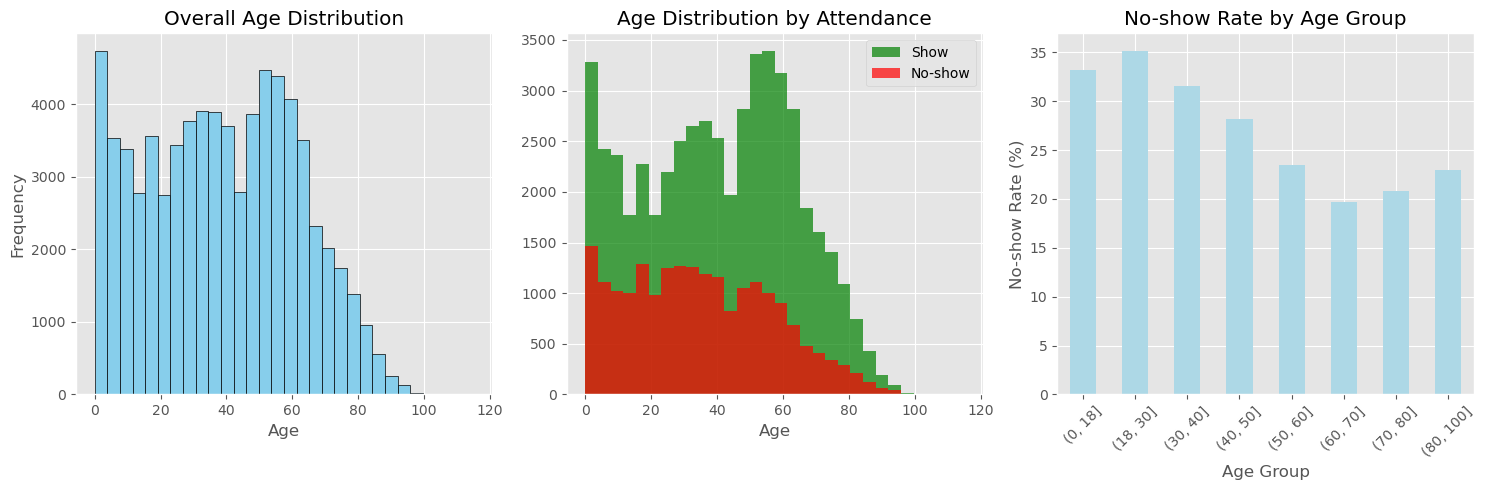

In [11]:
print("Age Distribution Analysis")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['Age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Overall Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
df[df['no_show_binary'] == 0]['Age'].hist(bins=30, alpha=0.7, label='Show', color='green')
df[df['no_show_binary'] == 1]['Age'].hist(bins=30, alpha=0.7, label='No-show', color='red')
plt.title('Age Distribution by Attendance')
plt.xlabel('Age')
plt.legend()

plt.subplot(1, 3, 3)
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]
df['age_group'] = pd.cut(df['Age'], bins=age_bins)
age_group_rate = df.groupby('age_group')['no_show_binary'].mean() * 100
age_group_rate.plot(kind='bar', color='lightblue')
plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-show Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Gender Analysis

In [12]:
print("Gender Analysis")
gender_analysis = df.groupby('Gender').agg({
    'no_show_binary': ['count', 'mean']
}).round(3)
gender_analysis.columns = ['Total Appointments', 'No-show Rate']
print(gender_analysis)

Gender Analysis
        Total Appointments  No-show Rate
Gender                                  
F                    48070         0.284
M                    23889         0.287


### Medical Condition Analysis

Health Conditions vs No-show Rates


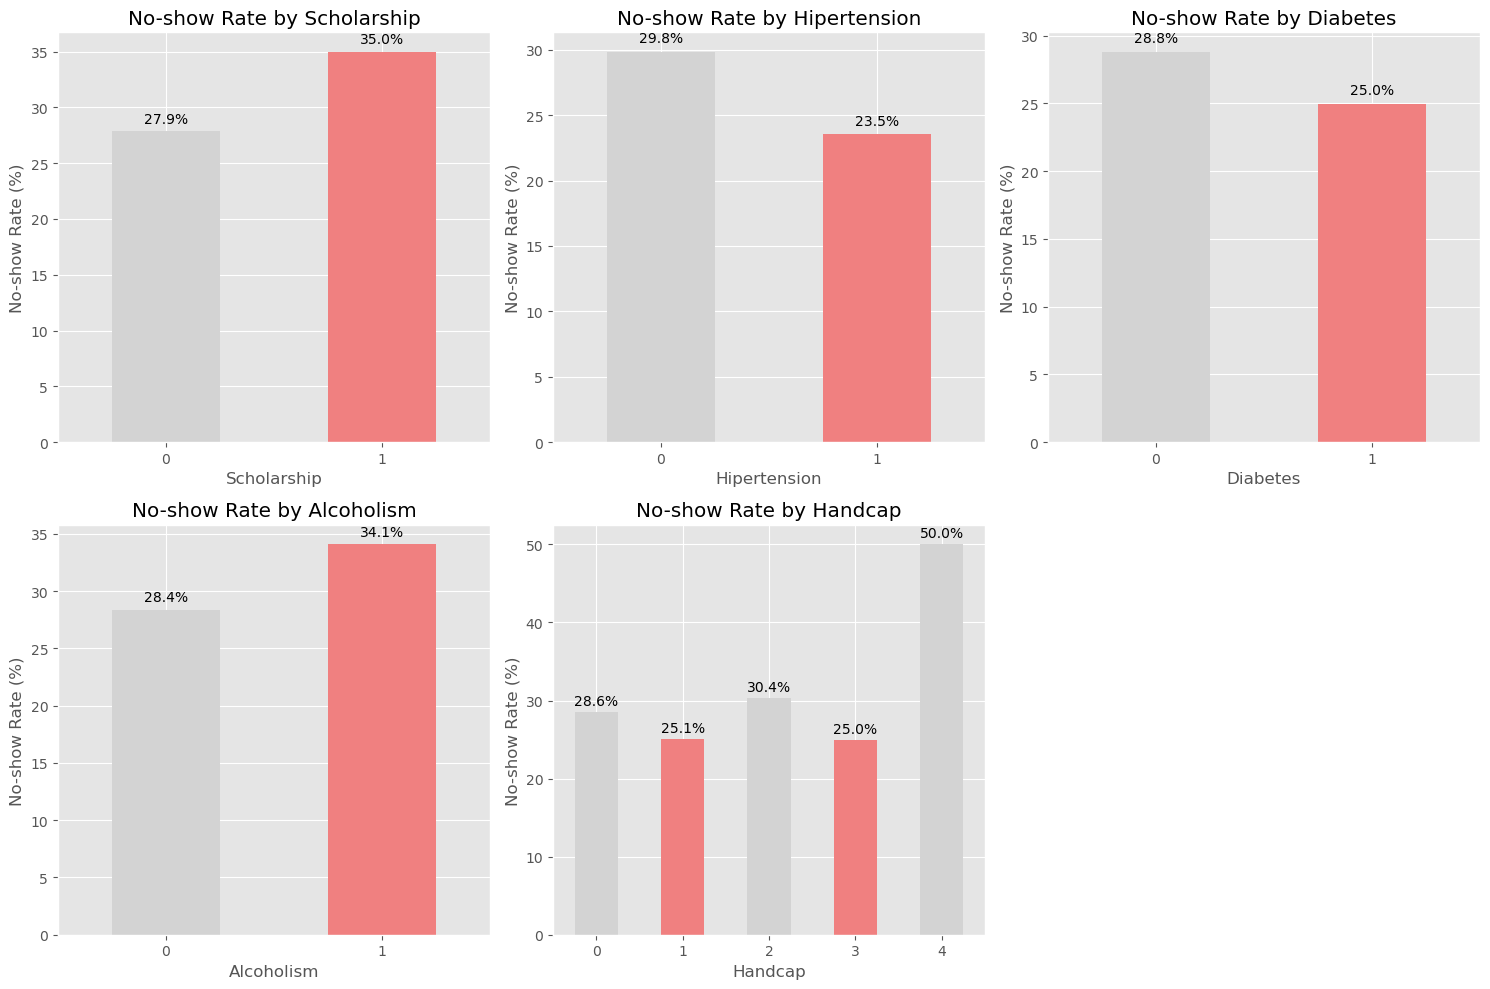

In [13]:
print("Health Conditions vs No-show Rates")

health_conditions = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

plt.figure(figsize=(15, 10))
for i, condition in enumerate(health_conditions, 1):
    plt.subplot(2, 3, i)
    condition_rate = df.groupby(condition)['no_show_binary'].mean() * 100
    condition_rate.plot(kind='bar', color=['lightgray', 'lightcoral'])
    plt.title(f'No-show Rate by {condition}')
    plt.xlabel(condition)
    plt.ylabel('No-show Rate (%)')
    plt.xticks(rotation=0)
    
    for j, v in enumerate(condition_rate.values):
        plt.text(j, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Appointment Pattern Analysis

### SMS Reminder Impact

In [14]:
print("SMS Reminder Effectiveness")

sms_impact = df.groupby('SMS_received').agg({
    'no_show_binary': ['count', 'mean']
}).round(3)
sms_impact.columns = ['Total Appointments', 'No-show Rate']
print(sms_impact)

SMS Reminder Effectiveness
              Total Appointments  No-show Rate
SMS_received                                  
0                          36477         0.294
1                          35482         0.276


### Waiting Days Impact

Waiting Days Impact Analysis


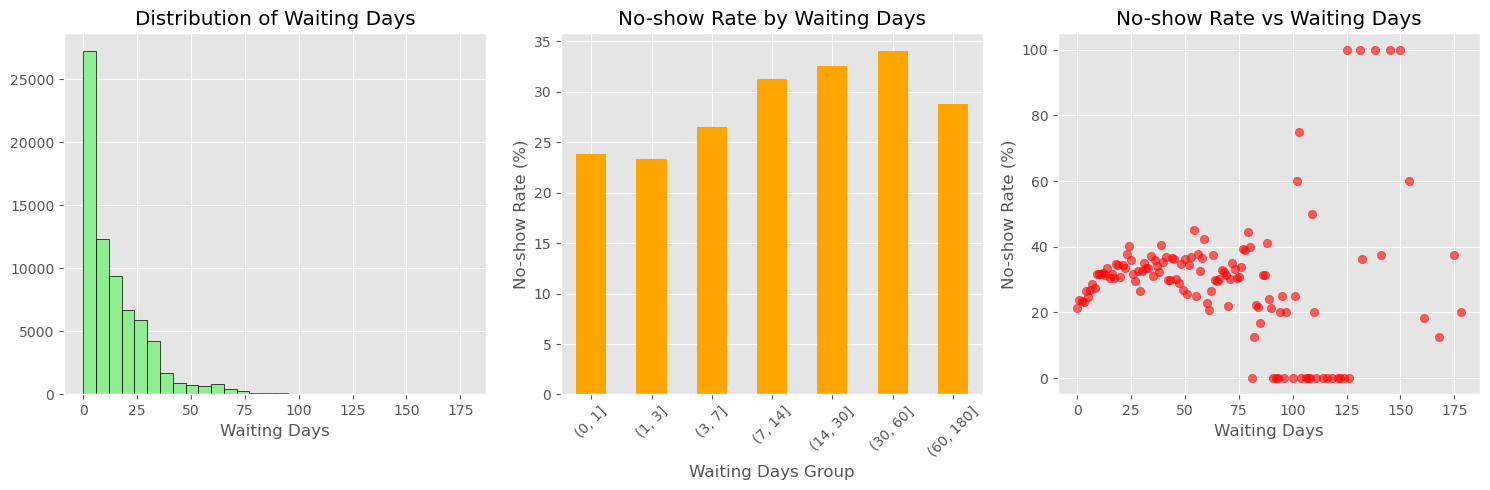

In [15]:
print("Waiting Days Impact Analysis")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['waiting_days'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Waiting Days')
plt.xlabel('Waiting Days')

plt.subplot(1, 3, 2)
waiting_bins = [0, 1, 3, 7, 14, 30, 60, 180]
df['waiting_group'] = pd.cut(df['waiting_days'], bins=waiting_bins)
waiting_rate = df.groupby('waiting_group')['no_show_binary'].mean() * 100
waiting_rate.plot(kind='bar', color='orange')
plt.title('No-show Rate by Waiting Days')
plt.xlabel('Waiting Days Group')
plt.ylabel('No-show Rate (%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
# Scatter plot of waiting days vs no-show rate
waiting_corr = df.groupby('waiting_days')['no_show_binary'].mean() * 100
plt.scatter(waiting_corr.index, waiting_corr.values, alpha=0.6, color='red')
plt.title('No-show Rate vs Waiting Days')
plt.xlabel('Waiting Days')
plt.ylabel('No-show Rate (%)')

plt.tight_layout()
plt.show()

## Day of Week Analysis

### Appointment Day Patterns

Day of week value counts:
appointment_dow
Wednesday    17044
Tuesday      16462
Monday       14581
Friday       12516
Thursday     11325
Saturday        31
Name: count, dtype: int64
No-show rates by day:
appointment_dow
Friday       29.354426
Monday       30.210548
Saturday     29.032258
Thursday     27.267108
Tuesday      28.666019
Wednesday    27.147383
Name: no_show_binary, dtype: float64
NaN values in dow_rate: 0


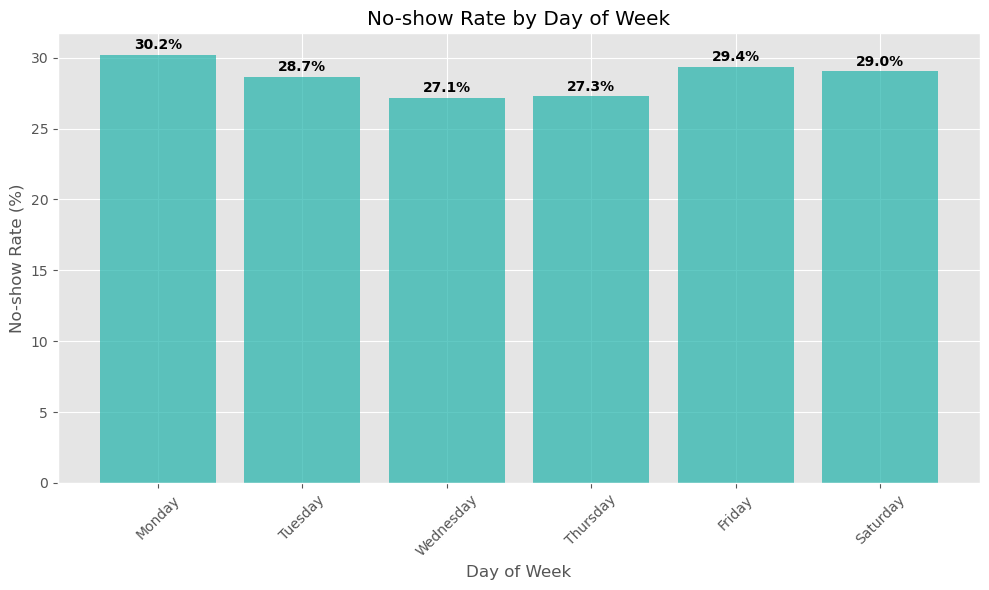

In [16]:
# Create day of week feature
df['appointment_dow'] = df['AppointmentDay'].dt.day_name()

# Check for any issues in the new column
print("Day of week value counts:")
print(df['appointment_dow'].value_counts())

# Calculate no-show rates by day of week
dow_rate = df.groupby('appointment_dow')['no_show_binary'].mean() * 100

print("No-show rates by day:")
print(dow_rate)

# Check for NaN values
print(f"NaN values in dow_rate: {dow_rate.isna().sum()}")

# Remove any NaN values
dow_rate = dow_rate.dropna()

# Define proper day order
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Only include days that exist in our data
dow_order = [day for day in dow_order if day in dow_rate.index]

if len(dow_order) > 0:
    dow_rate = dow_rate.reindex(dow_order)
    
    # Create the visualization
    plt.figure(figsize=(10, 6))
    
    # Create bars
    bars = plt.bar(range(len(dow_rate)), dow_rate.values, color='lightseagreen', alpha=0.7)
    
    plt.title('No-show Rate by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('No-show Rate (%)')
    plt.xticks(range(len(dow_rate)), dow_order, rotation=45)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, dow_rate.values)):
        plt.text(i, value + 0.2, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## Correlation Analysis

### Correlation Matrix

Correlation Analysis


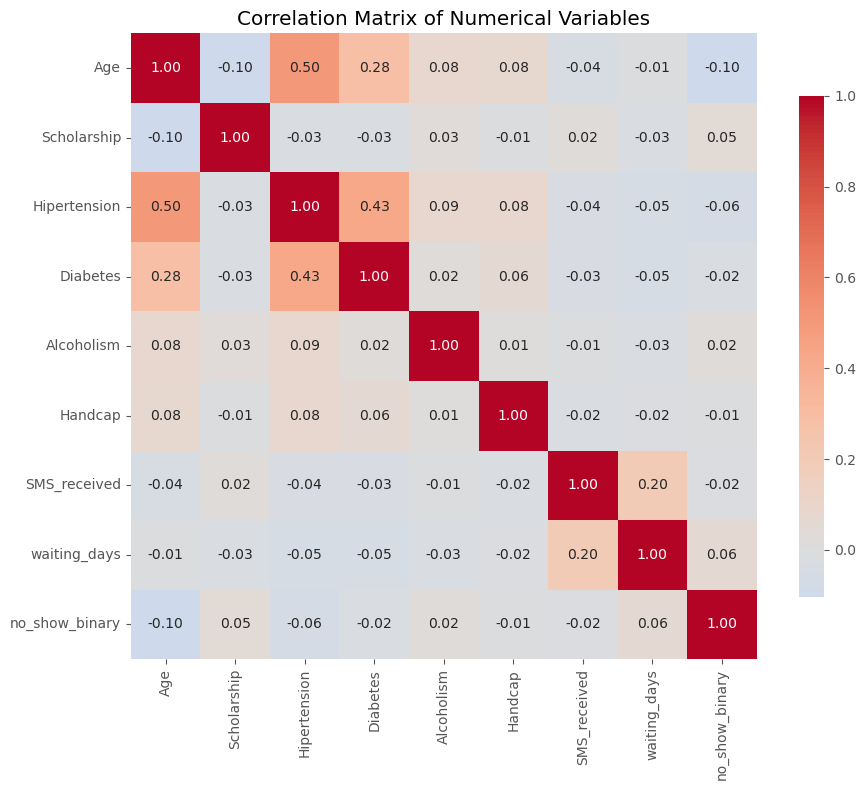

Top correlations with no-show:
no_show_binary    1.000000
waiting_days      0.060362
Scholarship       0.045687
Alcoholism        0.019864
Handcap          -0.007184
SMS_received     -0.020631
Diabetes         -0.022412
Hipertension     -0.056859
Age              -0.101042
Name: no_show_binary, dtype: float64


In [17]:
print("Correlation Analysis")

numerical_cols = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 
                 'Alcoholism', 'Handcap', 'SMS_received', 'waiting_days', 'no_show_binary']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

print("Top correlations with no-show:")
no_show_corr = correlation_matrix['no_show_binary'].sort_values(ascending=False)
print(no_show_corr)

## Save the Cleaned Dataset

In [18]:
df.to_csv('../data/cleaned_medical_noshow.csv', index=False)
print("Cleaned dataset saved as 'cleaned_medical_noshow.csv'")

Cleaned dataset saved as 'cleaned_medical_noshow.csv'
